In [1]:
import pandas as pd

In [3]:
variants=pd.read_csv("Data/training_variants")

In [12]:
txt=pd.read_csv("Data/training_text_cleaned")

In [15]:
txt=txt.Text

In [16]:
stopword_set=set(["i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"])

In [17]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [18]:
def remove_stopwd(sentence,stop):
    if (type(sentence)!=list):
        result=[]
    else:
        result=[k for k in sentence if k not in stop]
    return result

In [19]:
txt=txt.str.replace("[\?\!\"\:\;\.\,\'\(\)\[\]\{\}]", "")
txt=txt.str.lower().str.split()

In [22]:
txt=txt.apply(lambda x: remove_stopwd(x,stopword_set))

In [23]:
txt

0       [cyclin-dependent, kinases, cdks, regulate, va...
1       [abstract, background, non-small, cell, lung, ...
2       [abstract, background, non-small, cell, lung, ...
3       [recent, evidence, demonstrated, acquired, uni...
4       [oncogenic, mutations, monomeric, casitas, b-l...
5       [oncogenic, mutations, monomeric, casitas, b-l...
6       [oncogenic, mutations, monomeric, casitas, b-l...
7       [cbl, negative, regulator, activated, receptor...
8       [abstract, juvenile, myelomonocytic, leukemia,...
9       [abstract, juvenile, myelomonocytic, leukemia,...
10      [oncogenic, mutations, monomeric, casitas, b-l...
11      [noonan, syndrome, autosomal, dominant, congen...
12      [noonan, syndrome, autosomal, dominant, congen...
13      [noonan, syndrome, autosomal, dominant, congen...
14      [oncogenic, mutations, monomeric, casitas, b-l...
15      [noonan, syndrome, autosomal, dominant, congen...
16      [determine, residual, cylindrical, refractive,...
17      [acqui

In [57]:
for i in range(3321):
    txt[i]=TaggedDocument(txt[i].words,["Diagnos_"+str(i)])

In [62]:
model = Doc2Vec(txt, dm = 0, alpha=0.1, size= 100, min_alpha=0.025)

In [63]:
model.save("Doc2Vec_on_our_texts_second_trial")

In [66]:
model.docvecs.most_similar("Diagnos_0")

[('Diagnos_1504', 0.5885646343231201),
 ('Diagnos_37', 0.579461395740509),
 ('Diagnos_38', 0.5451967120170593),
 ('Diagnos_42', 0.5168078541755676),
 ('Diagnos_3062', 0.5060362219810486),
 ('Diagnos_1068', 0.4872601628303528),
 ('Diagnos_1545', 0.4839828610420227),
 ('Diagnos_2953', 0.48112592101097107),
 ('Diagnos_1067', 0.47609826922416687),
 ('Diagnos_41', 0.47152483463287354)]

In [51]:
model["aml1/evi-1"].shape

(100,)

In [55]:
model.docvecs.most_similar("Diagnos_0")

KeyError: "doc 'Diagnos_0' not in trained set"

In [56]:
txt[0]

TaggedDocument(words=['cyclin-dependent', 'kinases', 'cdks', 'regulate', 'variety', 'fundamental', 'cellular', 'processes', 'cdk10', 'stands', 'one', 'last', 'orphan', 'cdks', 'activating', 'cyclin', 'identified', 'kinase', 'activity', 'revealed', 'previous', 'work', 'shown', 'cdk10', 'silencing', 'increases', 'ets2', 'v-ets', 'erythroblastosis', 'virus', 'e26', 'oncogene', 'homolog', '2-driven', 'activation', 'mapk', 'pathway', 'confers', 'tamoxifen', 'resistance', 'breast', 'cancer', 'cells', 'precise', 'mechanisms', 'cdk10', 'modulates', 'ets2', 'activity', 'generally', 'functions', 'cdk10', 'remain', 'elusive', 'demonstrate', 'cdk10', 'cyclin-dependent', 'kinase', 'identifying', 'cyclin', 'm', 'activating', 'cyclin', 'cyclin', 'm', 'orphan', 'cyclin', 'product', 'fam58a', 'whose', 'mutations', 'cause', 'star', 'syndrome', 'human', 'developmental', 'anomaly', 'whose', 'features', 'include', 'toe', 'syndactyly', 'telecanthus', 'anogenital', 'renal', 'malformations', 'show', 'star', '

In [80]:
len(model.docvecs)

3321

In [81]:
x=list(model.docvecs)

In [88]:
y_=list(variants.Class)
y=[]

In [89]:
for i in range(len(y_)):
    if y_[i]==1:
        y.append([1,0,0,0,0,0,0,0,0])
    elif y_[i]==2:
        y.append([0,1,0,0,0,0,0,0,0])
    elif y_[i]==3:
        y.append([0,0,1,0,0,0,0,0,0])
    elif y_[i]==4:
        y.append([0,0,0,1,0,0,0,0,0])
    elif y_[i]==5:
        y.append([0,0,0,0,1,0,0,0,0])
    elif y_[i]==6:
        y.append([0,0,0,0,0,1,0,0,0])
    elif y_[i]==7:
        y.append([0,0,0,0,0,0,1,0,0])
    elif y_[i]==8:
        y.append([0,0,0,0,0,0,0,1,0])
    elif y_[i]==9:
        y.append([0,0,0,0,0,0,0,0,1])

In [90]:
y

[[1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0,

In [96]:
x_train=x[:3000]
y_train=y[:3000]
x_test=x[3000:]
y_test=y[3000:]

In [94]:
from keras.layers import Dense, Activation
from keras.models import Sequential
import keras

model = Sequential()

model.add(Dense(256, input_dim=100, activation='relu'))
model.add(Dense(126, activation='relu'))

model.add(Dense(9, activation='softmax'))

In [103]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [101]:
import numpy as np

In [107]:
model.fit(np.array(x_train),y_train,epochs=20, batch_size=10)

Epoch 1/20
3000/3000 [==============================] - 0s - loss: 0.1752 - acc: 0.9274     
Epoch 2/20
3000/3000 [==============================] - 0s - loss: 0.1561 - acc: 0.9350     
Epoch 3/20
3000/3000 [==============================] - 0s - loss: 0.1398 - acc: 0.9423     
Epoch 4/20
3000/3000 [==============================] - 0s - loss: 0.1270 - acc: 0.9473     
Epoch 5/20
3000/3000 [==============================] - 0s - loss: 0.1131 - acc: 0.9534     
Epoch 6/20
3000/3000 [==============================] - 0s - loss: 0.1040 - acc: 0.9577     
Epoch 7/20
3000/3000 [==============================] - 0s - loss: 0.0955 - acc: 0.9594     
Epoch 8/20
3000/3000 [==============================] - 0s - loss: 0.0872 - acc: 0.9631     
Epoch 9/20
3000/3000 [==============================] - 0s - loss: 0.0811 - acc: 0.9666     
Epoch 10/20
3000/3000 [==============================] - 0s - loss: 0.0755 - acc: 0.9689     
Epoch 11/20
3000/3000 [==============================] - 0s - loss: 0

In [109]:
model.predict(np.array([x_test[0]]))

array([[  1.98498992e-06,   6.37883961e-01,   2.19387516e-06,
          5.65109474e-07,   3.06516740e-04,   5.58095658e-03,
          3.56127143e-01,   8.07070101e-05,   1.59971642e-05]], dtype=float32)

In [110]:
y_test[0]

[0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_test_processed=[]
for i in x_test:
    y_test_processed.append(model.)

In [112]:
scores = model.evaluate(np.array(x_test), y_test, verbose=0)

In [113]:
scores

[0.532121651454878, 0.87019726049120183]

In [114]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 87.02%


In [115]:
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

loss: 53.21%


In [125]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

def plotDocs(model):
    docs_np = []
    #a list of labels (words)
    docs_label = []
    for doc in range(len(model)):
        docs_np.append(model[doc])
        docs_label.append(doc)
    print('Added %s words. Shape %s'%(len(docs_np),np.shape(docs_np)))

    pca = decomposition.PCA(n_components=2)
    pca.fit(docs_np)
    reduced= pca.transform(docs_np)

    # plt.plot(pca.explained_variance_ratio_)
    for index,vec in enumerate(reduced):
        # print ('%s %s'%(words_label[index],vec))
        if index <100:
            x,y=vec[0],vec[1]
            plt.scatter(x,y)
            plt.annotate(docs_label[index],xy=(x,y))
    plt.show()

In [123]:
doc2vec=Doc2Vec.load("Doc2Vec_on_our_texts_second_trial")

Added 3321 words. Shape (3321, 100)


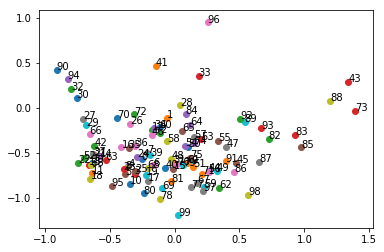

In [126]:
plotDocs(doc2vec.docvecs)